**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

**Data Set Information:**
This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor. 

lets predict it...

**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/diabetes_data_upload.csv')
df1 = df.copy()
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

Number of rows : 520
Number of columns : 17
No missing values 

Dataset Pre-Processing

In [ ]:
{ column: len(data[column].unique())for column in data.columns}

{'Age': 51,
 'Alopecia': 2,
 'Gender': 2,
 'Genital thrush': 2,
 'Irritability': 2,
 'Itching': 2,
 'Obesity': 2,
 'Polydipsia': 2,
 'Polyphagia': 2,
 'Polyuria': 2,
 'class': 2,
 'delayed healing': 2,
 'muscle stiffness': 2,
 'partial paresis': 2,
 'sudden weight loss': 2,
 'visual blurring': 2,
 'weakness': 2}

**Distribution of Data**

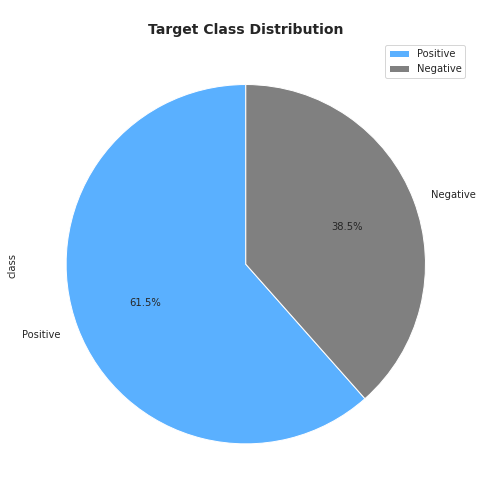

In [ ]:
# green="#5bb46c"
# red="#e4564a"
red="#ff8c94"
blue="#5ab0ff"
green="#99ff99"
green='#63ee33'
red="#ee3338"
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
df["class"].value_counts().plot(kind="pie",colors=[blue,'grey'],legend=True,labels=["Positive","Negative"],
                               startangle=90,autopct='%1.1f%%')
plt.title('\nTarget Class Distribution',fontweight='bold',fontsize=14)
plt.tight_layout()
plt.show()

**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


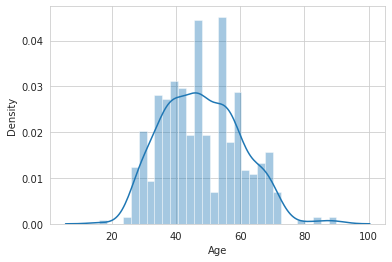

In [ ]:
sns.distplot(df['Age'],bins=30) 

**Distribution of Types**

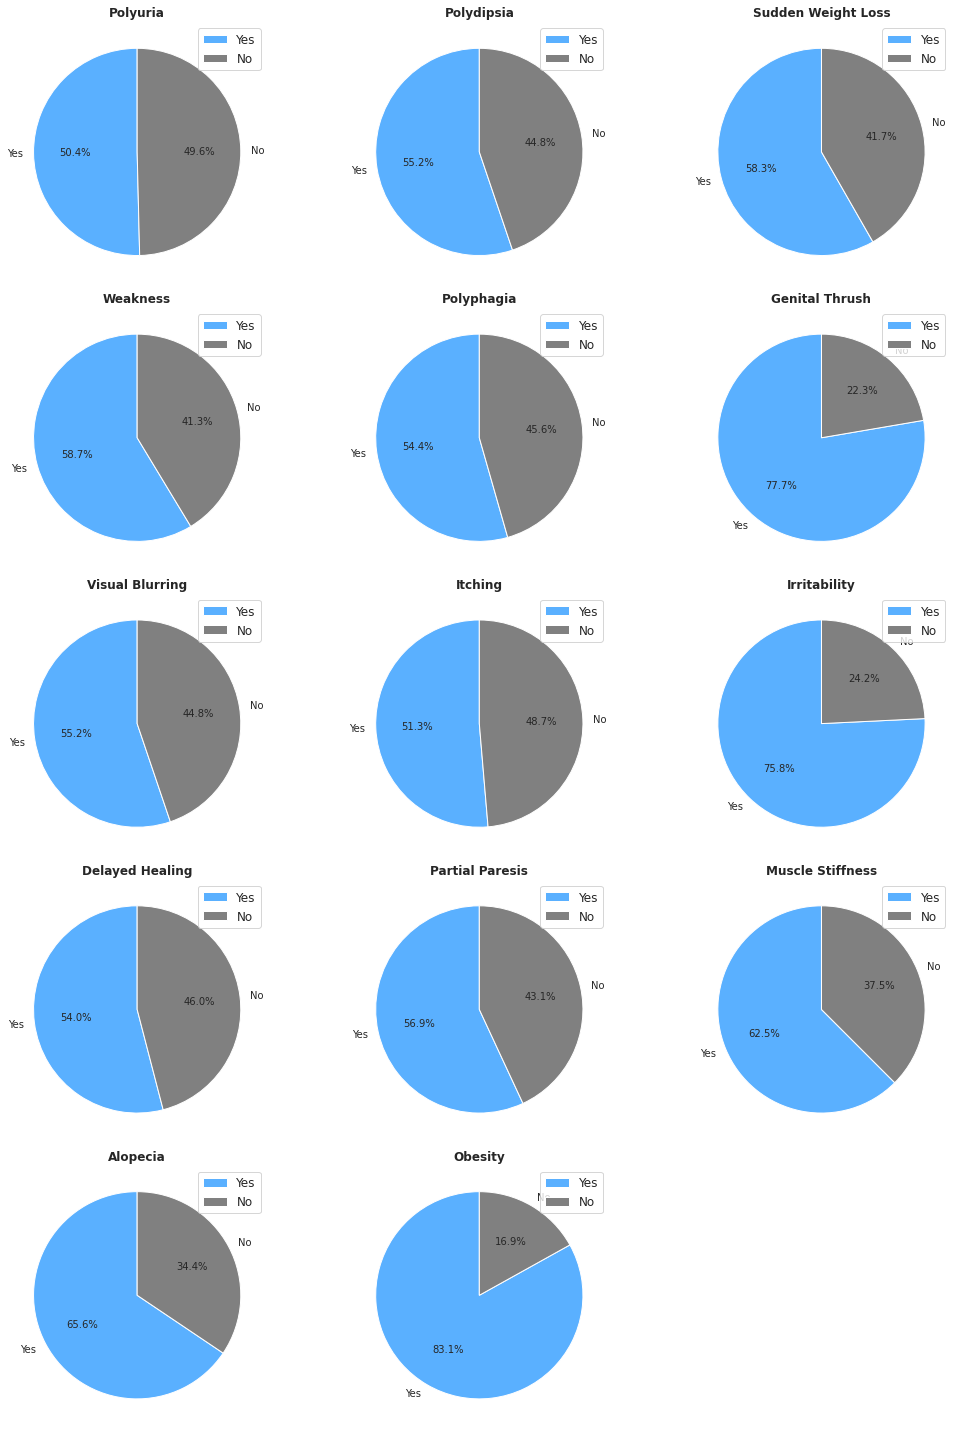

In [ ]:
cou = 1
plt.figure(figsize=(15,20))
print('\n\n')
for i in df1.columns:
    if i not in ['class','Age','Gender','Age Group']:
        plt.subplot(5,3,cou)
        plt.title(f'{i.title()}',fontweight='bold',fontsize=14)
        cou += 1
        plt.tight_layout()
        df1[i].value_counts().plot(kind="pie",colors=[blue,'grey'],legend=True,labels=["Yes","No"],
        startangle=90,autopct='%1.1f%%')
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout() 
plt.show()

**Heatmap**

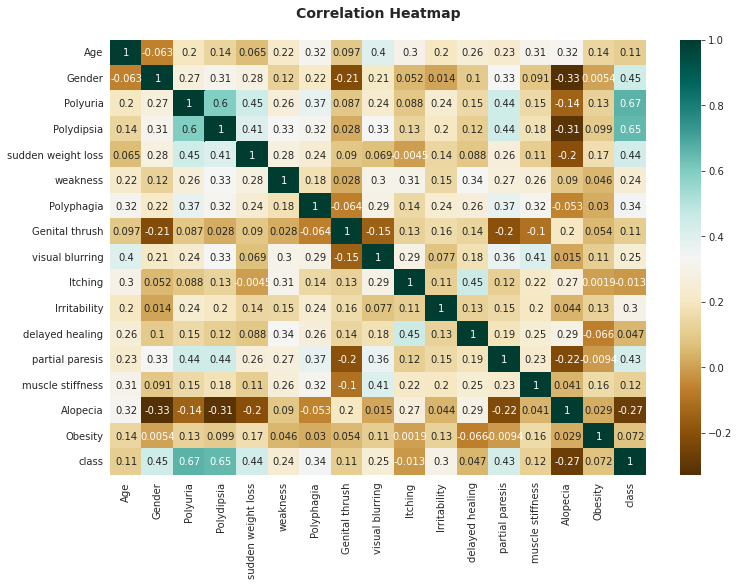

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='BrBG')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

**Polydipsia and Polyuria has some correlation**

**Polyuria** is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

Polydipsia **bold text** is a medical name for the feeling of extreme thirstiness. Polydipsia is often linked to urinary conditions that cause you to urinate a lot. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid

**Analysis based on Gender**

In [ ]:
df1.groupby("Gender")["class"].value_counts().unstack()

class,Negative,Positive
Gender,,
Female,19,173
Male,181,147


# **Females in the dataset turned out to be more more positive**

**Analysing the symptoms**

In [ ]:
ast = df1[df1["class"]=="Positive"]
ast.drop(['Age','Age Group','Gender','class'],axis=1,inplace=True)
ast = ast.apply(pd.Series.value_counts).transpose()
ast['Showed The Symptom']=ast['Yes']/(ast['Yes']+ast['No'])*100
ast["Didn't Show The Symptom"]=ast['No']/(ast['Yes']+ast['No'])*100
ast.drop(['Yes','No'],inplace=True,axis=1)
print('\033[1m'+'\n\t People who were tested positive for Diabetes')
print('**********************************************************')
ast.sort_values(by = 'Showed The Symptom',ascending=False)



	 People who were tested positive for Diabetes
**********************************************************


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Showed The Symptom,Didn't Show The Symptom
Polyuria,75.9375,24.0625
Polydipsia,70.3125,29.6875
weakness,68.1250,31.8750
partial paresis,60.0000,40.0000
Polyphagia,59.0625,40.9375
sudden weight loss,58.7500,41.2500
visual blurring,54.6875,45.3125
Itching,48.1250,51.8750
delayed healing,47.8125,52.1875
muscle stiffness,42.1875,57.8125


**Polyuria and Polydipsia are the major symptoms if the patient has diabetes.**

**Polyuria** is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

**Polydipsia** is a medical name for the feeling of extreme thirstiness. Polydipsia is often linked to urinary conditions that cause you to urinate a lot. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.

In [ ]:
def preprocessing(df):
    df= df.copy()
    
    # Gender column Binary Encoding
    df['Gender'] = df ['Gender'].replace({'Female':0,'Male':1 })
    
    #Symptom Column Binary Encoding
    for column in df.columns.drop(['Age','Gender','class']):
     df[column]= df[column].replace({'No':0 , 'Yes': 1})
    
    #train
    y=df["class"]
    X=df.drop("class", axis=1)
    
    #test_train_split
    X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)
    
    #StandardScaler
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index , columns=X_train.columns)
    X_test=pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)
    
    return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test= preprocessing(data)

In [ ]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
122,-0.658902,0.740902,-0.994521,1.129159,-0.846747,0.841974,1.104315,-0.560428,-0.870893,1.044966,1.682730,1.068259,1.148247,1.333651,-0.745356,2.165064
168,-0.913060,0.740902,-0.994521,-0.885615,-0.846747,0.841974,-0.905539,-0.560428,-0.870893,-0.956969,-0.594273,1.068259,-0.870893,-0.749821,1.341641,-0.461880
23,0.018852,0.740902,-0.994521,1.129159,1.180990,0.841974,-0.905539,-0.560428,1.148247,1.044966,1.682730,1.068259,-0.870893,-0.749821,-0.745356,-0.461880
13,1.120204,0.740902,1.005510,1.129159,1.180990,0.841974,1.104315,1.784351,1.148247,1.044966,-0.594273,-0.936103,-0.870893,-0.749821,1.341641,2.165064
61,-1.082499,-1.349706,1.005510,1.129159,1.180990,0.841974,1.104315,-0.560428,1.148247,1.044966,-0.594273,1.068259,1.148247,1.333651,-0.745356,-0.461880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.018852,0.740902,1.005510,1.129159,1.180990,0.841974,-0.905539,-0.560428,-0.870893,1.044966,-0.594273,-0.936103,1.148247,-0.749821,1.341641,-0.461880
144,1.713239,0.740902,1.005510,1.129159,-0.846747,-1.187685,1.104315,-0.560428,1.148247,1.044966,1.682730,-0.936103,1.148247,-0.749821,-0.745356,-0.461880
72,1.459081,-1.349706,-0.994521,-0.885615,-0.846747,-1.187685,-0.905539,1.784351,-0.870893,-0.956969,-0.594273,-0.936103,-0.870893,-0.749821,-0.745356,-0.461880
235,-1.844973,0.740902,-0.994521,-0.885615,-0.846747,-1.187685,-0.905539,-0.560428,-0.870893,-0.956969,-0.594273,-0.936103,-0.870893,-0.749821,-0.745356,-0.461880


In [ ]:
y_test

273    Negative
272    Negative
329    Negative
480    Negative
173    Positive
         ...   
335    Negative
407    Negative
330    Negative
257    Positive
95     Positive
Name: class, Length: 156, dtype: object

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.svm import SVC

svc = SVC()

In [ ]:
models= {
    'LogisticRegesssion   '  : LogisticRegression(),
    'K-NearstNeighbors    '  : KNeighborsClassifier(),
    'DecisionTree         '  : DecisionTreeClassifier(),
    'NaiveBayes           '  : GaussianNB(),
    'Randomforest         '  : RandomForestClassifier(),
    'SupportVectorMachine '  : SVC(),
        
   
}
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+ ': trained')

LogisticRegesssion   : trained
K-NearstNeighbors    : trained
DecisionTree         : trained
NaiveBayes           : trained
Randomforest         : trained
SupportVectorMachine : trained


In [ ]:
for name,model in models.items():
    print(name+ ": {:.2f}%".format(model.score(X_test,y_test) * 100))

LogisticRegrsssion   : 92.31%
K-NearstNeighbors    : 90.38%
DecisionTree         : 96.15%
NaiveBayes           : 90.38%
Randomforest         : 98.08%
SupportVectorMachine : 95.51%
